3.1 Studiul răspunsului indicial

Valoare Omega_0:  107.33774899765126
Valoare ra : 0.0126
Valoare T_A:  0.10833333333333334
Valoare T_M:  0.1352455637370406
Valoare T_J:  10.733774899765127
Castigul FDT: 68.25191877433195
Polii FDT: [-4.61538462+6.85201749j -4.61538462-6.85201749j]
Zerourile FDT: []


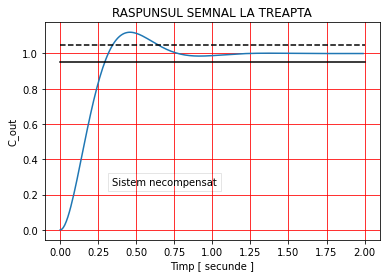

In [1]:
%matplotlib inline
# module python
import numpy
import os
from matplotlib import pyplot
from scipy import signal

# Preia directorul curent al aplicatiei
DirectorCurent = os.getcwd()

# Perioada de esantionare
Te = 0.01

# Parametrii electrici ai motorului de curent continuu
U_A = 200
I_A = 21
R_A = 0.12
L_A = 0.013
p = 1

# Parametrii mecanici ai actionarii
J = 0.16
M = 1.6
N_0 = 1025

# Viteza unghiulara
Omega_0 = numpy.pi * N_0 / 30
print("Valoare Omega_0: ", Omega_0)

# Marimi raportate
ra = R_A / (U_A / I_A)
print("Valoare ra :", ra)

# Constantele de timp
T_A = L_A / R_A
T_J = J * Omega_0 / M
T_M = ra * T_J
print("Valoare T_A: ", T_A)
print("Valoare T_M: ", T_M)
print("Valoare T_J: ", T_J)

# Perioada de esantionare
Te = 0.01

# Numarul de esantioane
Ne = 200

# Functia de transfer a motorului
Num = 1
Den = [T_M * T_A , T_M , 1]
G = signal.TransferFunction(Num, Den)

# Calculul zerourilor , polilor si castigului static al
# functiei de transfer
Zeros, Poles, Gain = signal.tf2zpk(Num, Den)
print("Castigul FDT:", Gain)
numpy.savetxt(DirectorCurent + '/CastigulFdt.txt', [Gain])
print("Polii FDT:", Poles)
numpy.savetxt(DirectorCurent + '/PoliiFdt.txt', [Poles])
print("Zerourile FDT:", Zeros)
numpy.savetxt(DirectorCurent + '/ZerourileFdt.txt', [Zeros])

# Simularea raspunsului la variatie treapta unitara a tensiunii U_A
pyplot.figure(0)
Timp = numpy.linspace(0, (Ne - 1) * Te, num=Ne)
Ref_In = numpy.ones_like(Timp)
TimpOut, C_out, X = signal.lsim(G, Ref_In, Timp)
pyplot.plot(Timp, C_out)
pyplot.xlabel('Timp [ secunde ]')
pyplot.ylabel('C_out')
pyplot.title('RASPUNSUL SEMNAL LA TREAPTA')
pyplot.grid(color = 'r', which='both')
pyplot.text(0.2, 0.25, 'Sistem necompensat',
  bbox=dict(facecolor='white', alpha=0.1), fontdict=None,
  transform=pyplot.gca().transAxes)

pyplot.plot([0, 2], [0.95, 0.95], 'k')
pyplot.plot([0, 2], [1.05, 1.05], 'k--')

pyplot.savefig(DirectorCurent + '/Fig1_RaspunsIndicial.png', format='png')
pyplot.show()

3.2 Diagramele Bode

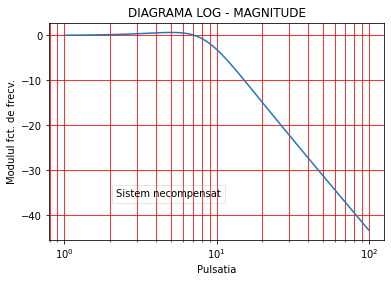

<Figure size 432x288 with 0 Axes>

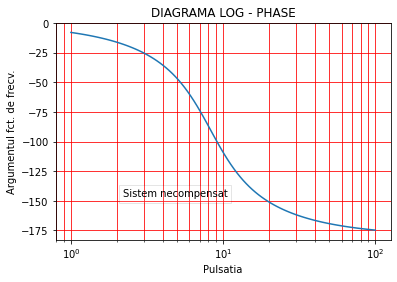

In [2]:
# Diagramele Bode ale sistemului necompensat
Freq, Magn, Phase = signal.bode(G)
pyplot.figure(1)
pyplot.semilogx(Freq, Magn)
pyplot.xlabel('Pulsatia')
pyplot.ylabel('Modulul fct. de frecv.')
pyplot.title('DIAGRAMA LOG - MAGNITUDE')
pyplot.grid(color='r', which='both')
pyplot.text(0.2, 0.2, 'Sistem necompensat',
  bbox=dict(facecolor='white', alpha=0.1), fontdict=None,
  transform=pyplot.gca().transAxes)
pyplot.show()
pyplot.savefig(DirectorCurent + '/Fig2_DiagramaLOG - MAG.png', format='png')
pyplot.figure(2)
pyplot.semilogx(Freq, Phase)
pyplot.xlabel('Pulsatia')
pyplot.ylabel('Argumentul fct. de frecv.')
pyplot.title('DIAGRAMA LOG - PHASE')
pyplot.grid(color='r', which='both')
pyplot.text(0.2, 0.2, 'Sistem necompensat',
  bbox=dict(facecolor='white', alpha=0.1), fontdict=None,
  transform=pyplot.gca().transAxes)
pyplot.savefig(DirectorCurent + '/Fig3_DiagramaLOG - PHASE.png', format='png')
pyplot.show()

4.1 Diagramele Bode ale regulatorului cu avans de fază

td este :  8.261471949618418
[ 0.          0.99137663 10.        ]
[0, 0.008261471949618418, 1]
TransferFunctionContinuous(
array([ 120.        , 1210.43805038]),
array([  1.        , 121.04380504]),
dt: None
)


/usr/local/lib/python3.8/dist-packages/scipy/signal/filter_design.py:1631: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


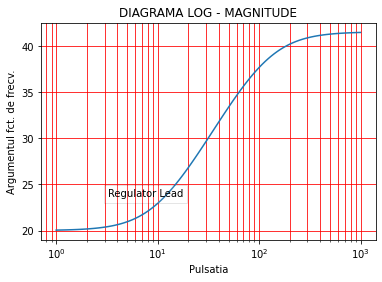

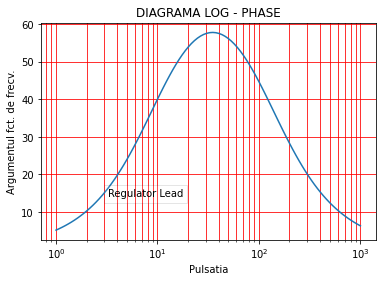

In [ ]:
Td = numpy.sqrt(1 / (T_A * T_M))
print("td este : ", Td)
Alfa = 0.012
Beta = 0.001
# ~~~~~~~~
Ta = 0.1
Tb = 0.1208313
# ~~~~~~~~
Kr = 10
Num_Lead = numpy.multiply([0 , Alfa*Td, 1], Kr) # alfa
Den_Lead = [0, Beta*Td, 1] # beta
print(Num_Lead)
print(Den_Lead)
GLead = signal.TransferFunction(Num_Lead, Den_Lead)
print(GLead)
numpy.savetxt(DirectorCurent + '/NumRegLead.txt', Num_Lead)
numpy.savetxt(DirectorCurent + '/DenRegLead.txt', Den_Lead)

# Diagramele Bode ale regulatorului lead
FreqLead, MagnLead, PhaseLead = signal.bode(GLead)

# Printare
pyplot.figure(3)
pyplot.semilogx(FreqLead, MagnLead)
pyplot.xlabel('Pulsatia')
pyplot.ylabel('Argumentul fct. de frecv.')
pyplot.title('DIAGRAMA LOG - MAGNITUDE')
pyplot.grid(color='r', which='both')
pyplot.text(0.2 , 0.2, 'Regulator Lead',
  bbox=dict(facecolor='white', alpha=0.1), fontdict = None,
  transform=pyplot.gca().transAxes)
pyplot.savefig(DirectorCurent + '/Fig4_DiagramaLOG - MAG_RegLead.png', format='png')
pyplot.show()

pyplot.figure(4)
pyplot.semilogx(FreqLead, PhaseLead)
pyplot.xlabel('Pulsatia')
pyplot.ylabel('Argumentul fct. de frecv.')
pyplot.title('DIAGRAMA LOG - PHASE')
pyplot.grid(color='r', which='both')
pyplot.text(0.2, 0.2, 'Regulator Lead',
  bbox=dict(facecolor='white', alpha=0.1), fontdict=None,
  transform=pyplot.gca().transAxes)
pyplot.savefig(DirectorCurent + '/Fig5_DiagramaLOG - PHASE_RegLead.png', format='png')
pyplot.show()

4.2 Diagramele Bode în buclă deschisă ale sistemului compensat

[ 0.99137663 10.        ]
[1.21043805e-04 1.57689302e-02 1.43507036e-01 1.00000000e+00]


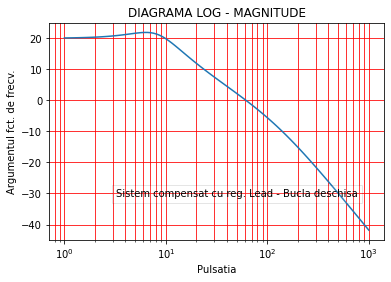

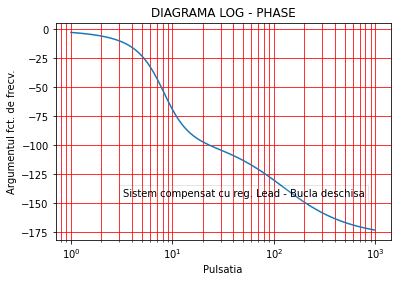

In [ ]:
# Functia de transfer in bucla deschisa
Num1 = numpy.polymul(Num_Lead, Num)
Den1 = numpy.polymul(Den_Lead, Den)
print(Num1)
print(Den1)
G1 = signal.TransferFunction(Num1, Den1)
numpy.savetxt(DirectorCurent + '/NumFdt_BuclaDeschisa.txt', Num1)
numpy.savetxt(DirectorCurent + '/DenFdt_BuclaDeschisa.txt', Den1)

# Diagramele Bode ale sistemului compensat in bucla deschisa
Freq1, Magn1, Phase1 = signal.bode(G1)

# Printare
pyplot.figure(5)
pyplot.semilogx(Freq1 , Magn1)
pyplot.xlabel('Pulsatia')
pyplot.ylabel('Argumentul fct. de frecv.')
pyplot.title('DIAGRAMA LOG - MAGNITUDE')
pyplot.grid(color='r', which='both')
pyplot.text(0.2, 0.2, 'Sistem compensat cu reg. Lead - Bucla deschisa',
  bbox=dict(facecolor='white', alpha=0.1), fontdict=None,
  transform=pyplot.gca().transAxes)
pyplot.savefig(DirectorCurent + '/Fig6_DiagramaLOG - MAG_RegLeadGIF.png', format='png')
pyplot.show()

pyplot.figure (6)
pyplot.semilogx(Freq1, Phase1)
pyplot.xlabel('Pulsatia')
pyplot.ylabel('Argumentul fct. de frecv.')
pyplot.title('DIAGRAMA LOG - PHASE')
pyplot.grid(color='r', which='both')
pyplot.text(0.2, 0.2, 'Sistem compensat cu reg. Lead - Bucla deschisa',
  bbox=dict(facecolor='white', alpha=0.1), fontdict=None,
  transform=pyplot.gca().transAxes)
pyplot.savefig(DirectorCurent + '/Fig7_DiagramaLOG - PHASE_RegLeadGIF.png', format='png')
pyplot.show()

5 Studiul caracteristicilor de performanță ale sistemului compensat

[ 0.99137663 10.        ]
[8.67454555e-05 1.13649761e-02 1.12961472e-01 1.00000000e+00]
[ 0.99137663 10.        ]
[8.67454555e-05 1.13649761e-02 1.10433811e+00 1.10000000e+01]


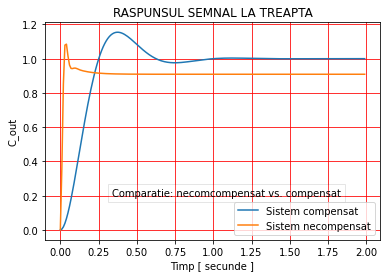

In [ ]:
%matplotlib inline
# module python
import numpy
import os
from matplotlib import pyplot
from scipy import signal

# Preia directorul curent al aplicatiei
DirectorCurent = os.getcwd()

# Perioada de esantionare
Te = 0.01

# Numarul de esantioane
Ne = 200

# Semnalul de intrare
Timp = numpy.linspace(0, (Ne -  1) * Te, num=Ne)
Ref_In = numpy.ones_like(Timp)

# Functia de transfer a instalatiei fixate
Num_IF = [1]
Den_IF = [0.0105, 0.1047, 1]
G_IF = signal.TransferFunction(Num_IF, Den_IF)
TimpOut_IF, C_Out_IF, X_Out = signal.lsim(G_IF, Ref_In, Timp)

def series(num1, den1, num2, den2):
  num = numpy.polymul(num1, num2)
  den = numpy.polymul(den1, den2)
  return num, den


def cloop(num, den):
  numr = numpy.polyadd(num, den)
  return num, numr

# Functia de transfer in bucla inchisa a sistemului de reglare automata
# NumG0 = [0.1173, 1]
# DenG0 = [0.0001, 0.0115, 0.1145, 1]
NumG0, DenG0 = series(Num_Lead, Den_Lead, Num_IF, Den_IF)
print(NumG0)
print(DenG0)
NumG0, DenG0 = cloop(NumG0, DenG0)
print(NumG0)
print(DenG0)
G0 = signal.TransferFunction(NumG0, DenG0)

# Simularea raspunsului la semnal de intrare treapta unitara
TimpOut, C_Out, X_Out = signal.lsim(G0, Ref_In, Timp)

# Printare
pyplot.plot(Timp, C_Out_IF, label='Sistem compensat')
pyplot.plot(Timp, C_Out, label='Sistem necompensat')
pyplot.xlabel('Timp [ secunde ]')
pyplot.ylabel('C_out')
pyplot.title('RASPUNSUL SEMNAL LA TREAPTA')
pyplot.grid(color='r', which='both')
pyplot.text(0.2, 0.2, 'Comparatie: necomcompensat vs. compensat',
  bbox=dict(facecolor='white', alpha=0.1),
  fontdict=None,
  transform=pyplot.gca().transAxes)

pyplot.legend()

# Salvare figura
pyplot.savefig(DirectorCurent + '/Fig_ComparatieSimulari.png', format='png')
pyplot.show()